In [16]:
import gzip        
import pickle    
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from scipy.signal import find_peaks



In [17]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

In [18]:
def get_GL_index(gl_array):
    gl_array = np.array(gl_array).astype(int)
    for i in range(1, len(gl_array)):
        if gl_array[i-1] == 0 and gl_array[i] == 1:
            return i
    return None

# INPUT: TEST VARIABLE + TEST VALUE + FILEPATH

In [19]:
# Comment out variables not used
# variable = "-4 Amin m/yr"
# variable = "-2 Amax m/yr"
# variable = "Amax -4 & Amin -4"
variable = "CF = 1.5"

# test_state = 'Retreating'
test_state = 'Retracted'
# test_state = 'Advancing'
# test_state = 'Extended'


# lead_up_yr = 4305     #Retreating
lead_up_yr = 4500       #Retracted
# lead_up_yr = 4900     #Advancing
# lead_up_yr = 5175     #Extended

value = "2kyr"

# Path to lead-up simulation (Retreating, Retracted, Advancing, Extended)

# Retreating
# path_leadup = "/home/kayatroyer/Repositories/brinkmodeltest/LeadUpRuns/RetreatState/DATA_Dictionary_2025_08_28__17_20_59.pkl.gz" 

# Retracted
path_leadup = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_28__17_55_27.pkl.gz" 

# Advancing
# path_leadup = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_29__10_37_33.pkl.gz" 

# Extended
# path_leadup = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_29__11_10_26.pkl.gz" 

path = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_08__17_33_06.pkl.gz"

In [20]:
with gzip.open(path, 'rb') as f:
    DATA_dict = pickle.load(f)

with gzip.open(path_leadup, 'rb') as f:
    DATA_dict_lead = pickle.load(f)



title_GL_better = "Grounding Line Evolution: " + variable + " - " + test_state
xaxis_GL_better = "Time (yrs)"
yaxis_GL_better = "Grounding Line Position (km)"

title_GLandVel = "Velocity Comparison to Grounding Line Location: " + variable + " - " + test_state
xaxis_vel = "Distance (km)"
yaxis_vel  = "Velocity (m/yr)"

title_SMB = "Glacier Surface VS Accumulation/Ablation " +  variable + " - " + test_state
xaxis_SMB = "Mass Balance (m/yr)"
yaxis_SMB = "Surface (m)"

title_bed = "Bedrock Erosion Evolution " + variable + " - " + test_state
xaxis_bed = "Distance (km)"
yaxis_bed = "Elevation (m)"

print(title_GL_better)

Grounding Line Evolution: CF = 1.5 - Retracted


## OPENING INDIVIDUAL DICTIONARIES

In [21]:
# Perturbation Data
bed_dict = DATA_dict['bed_dict']
base_dict = DATA_dict['base_dict']
surf_dict = DATA_dict['surf_dict']
sed_dict = DATA_dict['sed_dict']
H_dict = DATA_dict['H_dict']
us_dict = DATA_dict['us_dict']
ub_dict = DATA_dict['ub_dict']
Hs_dict = DATA_dict['Hs_dict']
GL_dict = DATA_dict['GL_dict']
Qs_dict = DATA_dict['Qs_dict']
SMB_dict = DATA_dict['SMB_dict']
counter_dict = DATA_dict['counter_dict']


GL_dict = {k + lead_up_yr: v for k, v in GL_dict.items()}

final_time = list(GL_dict)[-1]
print(final_time)


6500.815343816725


In [22]:
# Lead-up Data
bed_dict_l = DATA_dict_lead['bed_dict']
base_dict_l = DATA_dict_lead['base_dict']
surf_dict_l = DATA_dict_lead['surf_dict']
sed_dict_l = DATA_dict_lead['sed_dict']
H_dict_l = DATA_dict_lead['H_dict']
us_dict_l = DATA_dict_lead['us_dict']
ub_dict_l = DATA_dict_lead['ub_dict']
Hs_dict_l = DATA_dict_lead['Hs_dict']
GL_dict_l = DATA_dict_lead['GL_dict']
Qs_dict_l = DATA_dict_lead['Qs_dict']
SMB_dict_l = DATA_dict_lead['SMB_dict']
counter_dict_l = DATA_dict_lead['counter_dict']
final_time_l = list(GL_dict_l)[-1]
print(final_time_l)


4503.501068803568


## GL PLOT

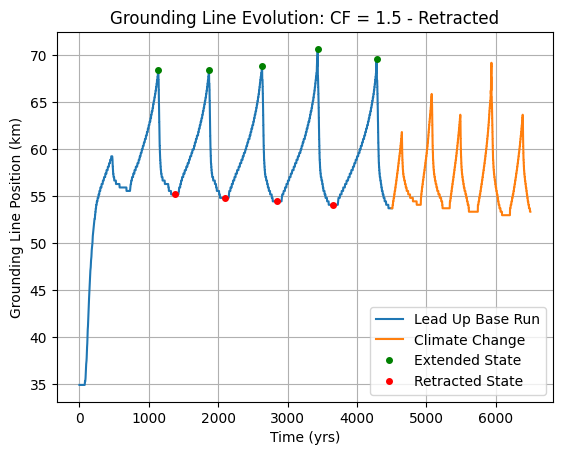

6500.815343816725


In [23]:
time = list(GL_dict.keys())
time_l = list(GL_dict_l.keys())

mesh_indices = np.arange(300)

data_matrix = np.array([GL_dict[t] for t in time])
data_matrix_l = np.array([GL_dict_l[t] for t in time_l])

gl_positions = [np.argmax(row > 0.5) for row in data_matrix]
gl_positions_l = [np.argmax(row > 0.5) for row in data_matrix_l]

GL_km = mesh_index_to_km(np.array(gl_positions))
GL_km_l = mesh_index_to_km(np.array(gl_positions_l))

peaks, _   = find_peaks(GL_km_l, prominence=5)
troughs, _ = find_peaks(-GL_km_l, prominence=5)

periods    = np.diff(np.array(time_l)[peaks])
adv_dists  = GL_km_l[peaks]
ret_dists  = GL_km_l[troughs]

# PLOTTING
fig, ax = plt.subplots()
ax.plot(time_l, GL_km_l, label='Lead Up Base Run')
ax.plot(time, GL_km, label='Climate Change')

ax.plot(np.array(time_l)[peaks],   adv_dists, 'go', label='Extended State', markersize=4)
ax.plot(np.array(time_l)[troughs], ret_dists, 'ro', label='Retracted State', markersize=4)

ax.legend()
ax.set_xlabel(xaxis_GL_better)
ax.set_ylabel(yaxis_GL_better)
ax.set_title(title_GL_better)
ax.grid()
plt.show()
print(time[-1])

# print(f"Mean cycle period: {np.mean(periods):.2f} years")
# print("Periods:", periods)
# print(f"Mean advance amplitude: {np.mean(adv_dists):.2f} km")
# print("Advances:", adv_dists)
# print(f"Mean retreat amplitude: {np.mean(ret_dists):.2f} km")
# print("Retreats:", ret_dists)

### Pulling Velocity Data

In [24]:
term_surface_velocity = []
term_basal_velocity = []

for t in sorted(us_dict.keys()): 
    us_ = us_dict[t]
    ub_ = ub_dict[t]

    notNAN = np.where(np.isfinite(us_))[0]

    if len(notNAN) > 0:
        terminus = notNAN[-1]
    else:
        terminus = None

    if terminus is not None and terminus >= 50:
        term_usvel = us_[terminus - 50]
        term_ubvel = ub_[terminus - 50]
    else:
        term_usvel = 0
        term_ubvel = 0

    if np.isnan(term_usvel):
        term_usvel = 0
    if np.isnan(term_ubvel):
        term_ubvel = 0

    term_surface_velocity.append(term_usvel)
    term_basal_velocity.append(term_ubvel)

## VELOCITY OVER GL PLOT

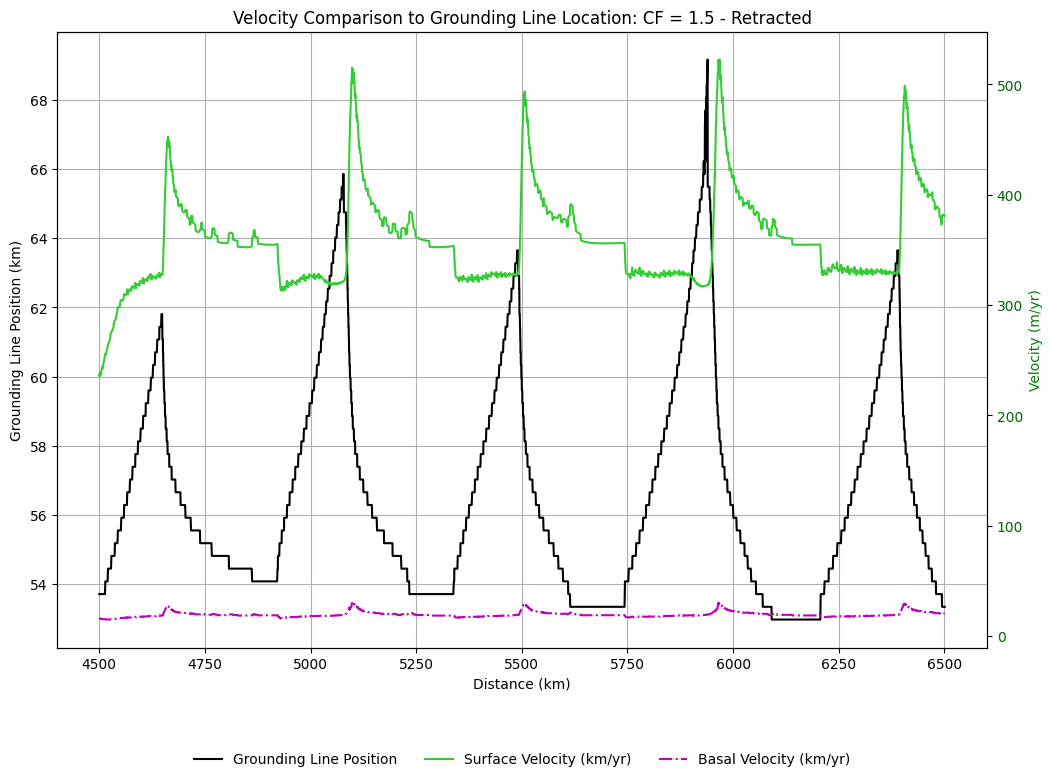

In [25]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# GL position
ax1.plot(time, GL_km, label='Grounding Line Position', color='black')
ax1.set_xlabel(xaxis_vel)
ax1.set_ylabel(yaxis_GL_better, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid()

# Velocity
ax2 = ax1.twinx()
ax2.plot(time, term_surface_velocity, 'limegreen',  label='Surface Velocity (km/yr)')
ax2.plot(time, term_basal_velocity, 'm-.', label='Basal Velocity (km/yr)')
ax2.set_ylabel(yaxis_vel, color='green')
ax2.tick_params(axis='y', labelcolor='darkgreen')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)

plt.title(title_GLandVel)
plt.show()


## BED ELEVATION CHANGE PLOT

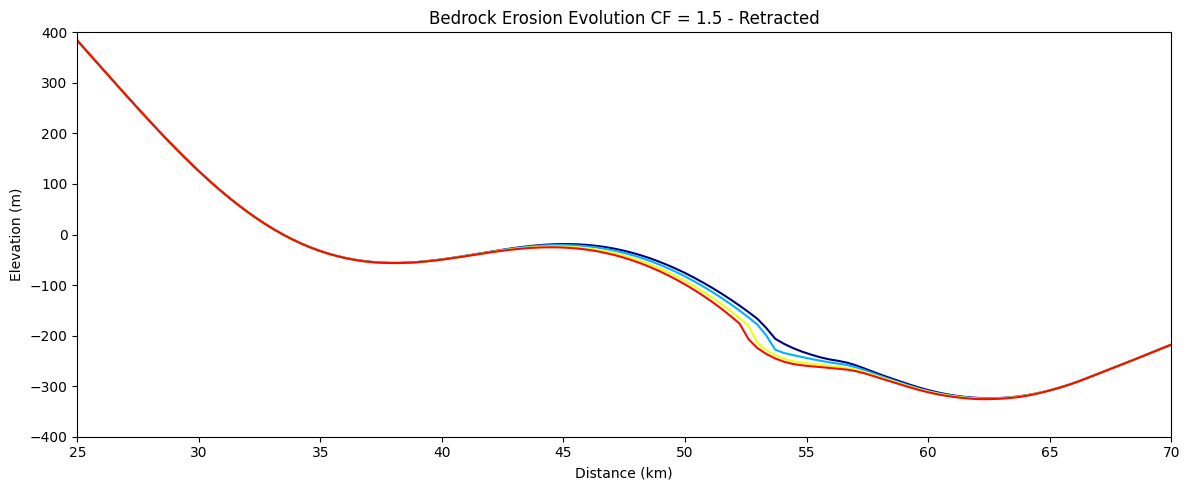

In [26]:
num_points = len(next(iter(bed_dict.values())))
x_km = mesh_index_to_km(np.arange(num_points))
time = list(bed_dict.keys())
# bed_profile = bed_dict[timesteps[0]] 
norm = plt.Normalize(min(time), max(time))
cmap = cm.jet

fig, ax1 = plt.subplots(figsize=(12,5))

for i, t in enumerate(time):
    if i % 1000 != 0:  
        continue

    bed = bed_dict[t]
    color = cmap(norm(t))
    plt.plot(x_km, bed, color=color, label=f't={t:.1f}' if i % 25 == 0 else "")

plt.xlabel(xaxis_bed)
plt.ylabel(yaxis_bed)
plt.title(title_bed)
# plt.gca().invert_xaxis() 
# plt.legend(loc="upper right", fontsize=7)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.xlim(25,70)
plt.ylim(-400,400)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
# plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/40K_Base_test/blah.svg", format ="svg", bbox_inches='tight')

## SMB PLOT

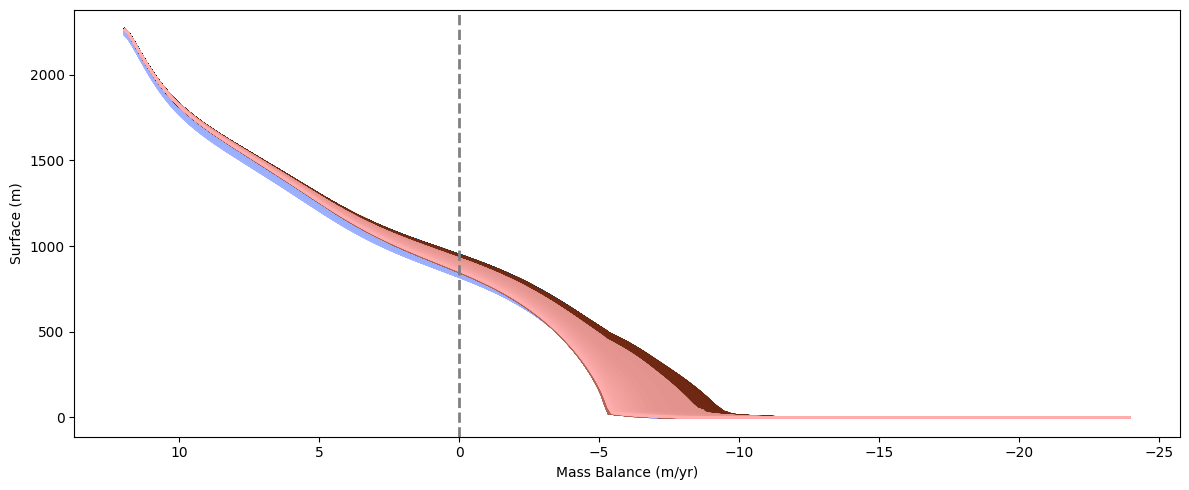

[ 11.94  11.82  11.7   11.58  11.46  11.34  11.22  11.1   10.98  10.86
  10.74  10.62  10.5   10.38  10.26  10.14  10.02   9.9    9.78   9.66
   9.54   9.42   9.3    9.18   9.06   8.94   8.82   8.7    8.58   8.46
   8.34   8.22   8.1    7.98   7.86   7.74   7.62   7.5    7.38   7.26
   7.14   7.02   6.9    6.78   6.66   6.54   6.42   6.3    6.18   6.06
   5.94   5.82   5.7    5.58   5.46   5.34   5.22   5.1    4.98   4.86
   4.74   4.62   4.5    4.38   4.26   4.14   4.02   3.9    3.78   3.66
   3.54   3.42   3.3    3.18   3.06   2.94   2.82   2.7    2.58   2.46
   2.34   2.22   2.1    1.98   1.86   1.74   1.62   1.5    1.38   1.26
   1.14   1.02   0.9    0.78   0.66   0.54   0.42   0.3    0.18   0.06
  -0.06  -0.18  -0.3   -0.42  -0.54  -0.66  -0.78  -0.9   -1.02  -1.14
  -1.26  -1.38  -1.5   -1.62  -1.74  -1.86  -1.98  -2.1   -2.22  -2.34
  -2.46  -2.58  -2.7   -2.82  -2.94  -3.06  -3.18  -3.3   -3.42  -3.54
  -3.66  -3.78  -3.9   -4.02  -4.14  -4.26  -4.38  -4.5   -4.62  -4.74
  -4.8

In [27]:
timesteps = sorted(SMB_dict.keys())
smb_profile = SMB_dict[timesteps[0]] 
cmap = cm.berlin

fig,ax  = plt.subplots(figsize=(12,5))


counts = sorted(counter_dict.values())  # all loop counts
sample_counts = counts[::1] 

# make a lookup: loop count → time
loop_to_time = {v: k for k, v in counter_dict.items()}

for j, c in enumerate(sample_counts):
    t = loop_to_time[c]
    surf = surf_dict[t]
    color = cmap(norm(t))
    label = f't={t:.1f}' if j % 5 == 0 else ""
    plt.plot(smb_profile, surf, color=color, label=label)


plt.xlabel(xaxis_SMB)
plt.ylabel(yaxis_SMB)
# plt.title(title_SMB)
plt.gca().invert_xaxis()
# plt.legend(loc="best", fontsize=8)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)
plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/FinalFigures/SMB_plot_40k_default.svg", format ="svg", bbox_inches='tight')

final_smb = list(SMB_dict.values())[-1]
print(final_smb)

## Plotting Thickness

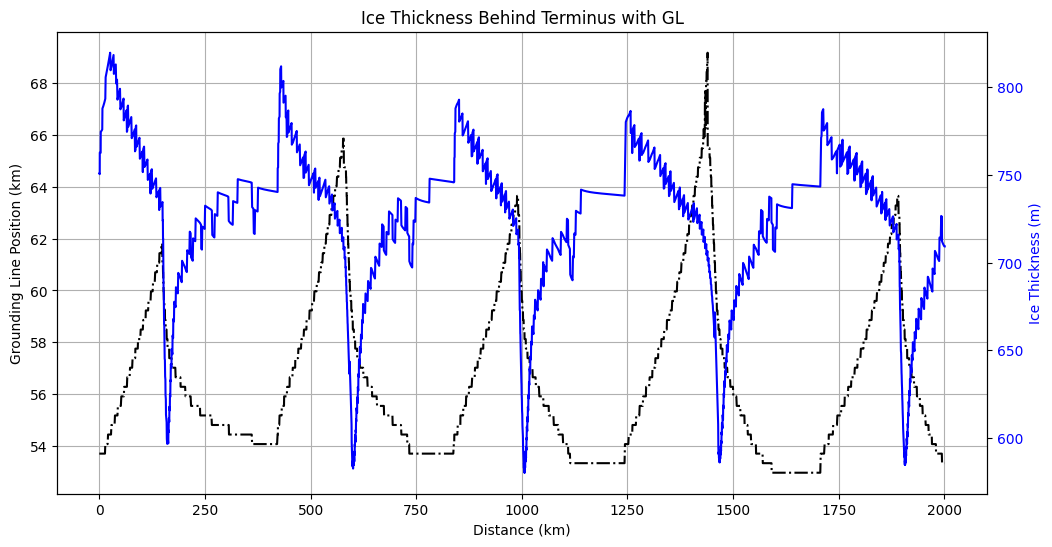

In [28]:
term_thinning = []
dist_behind_terminus = 50
time_steps = sorted(H_dict.keys())

for t in time_steps:
    H_ = H_dict[t]

    terminus_indices = np.where(H_ > 1.0)[0]

    if len(terminus_indices) == 0:
        term_thinning.append(np.nan)
        continue

    terminus = terminus_indices[-1]

    if terminus >= dist_behind_terminus:
        term_H = H_[terminus - dist_behind_terminus]
    else:
        term_H = np.nan

    term_thinning.append(term_H)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(time, GL_km, label='Grounding Line Position', ls = 'dashdot', color='black')
ax1.set_xlabel(xaxis_vel)
ax1.set_ylabel(yaxis_GL_better, color='black')
ax1.tick_params(axis='y', labelcolor='black')
# ax1.set_xlim(2000,8000)
ax1.grid()

# Secondary axis for velocities
ax2 = ax1.twinx()
ax2.plot(time_steps, term_thinning, color='blue', linestyle='-', label=f'Thickness {dist_behind_terminus} nodes behind terminus')
ax2.set_ylabel(("Ice Thickness (m)"), color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Ice Thickness Behind Terminus with GL")
plt.show()

# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/20kTests/40K_Base_test/Thickness_plot_40k_default.svg", format ="svg", bbox_inches='tight')

## Velocity VS Thickness


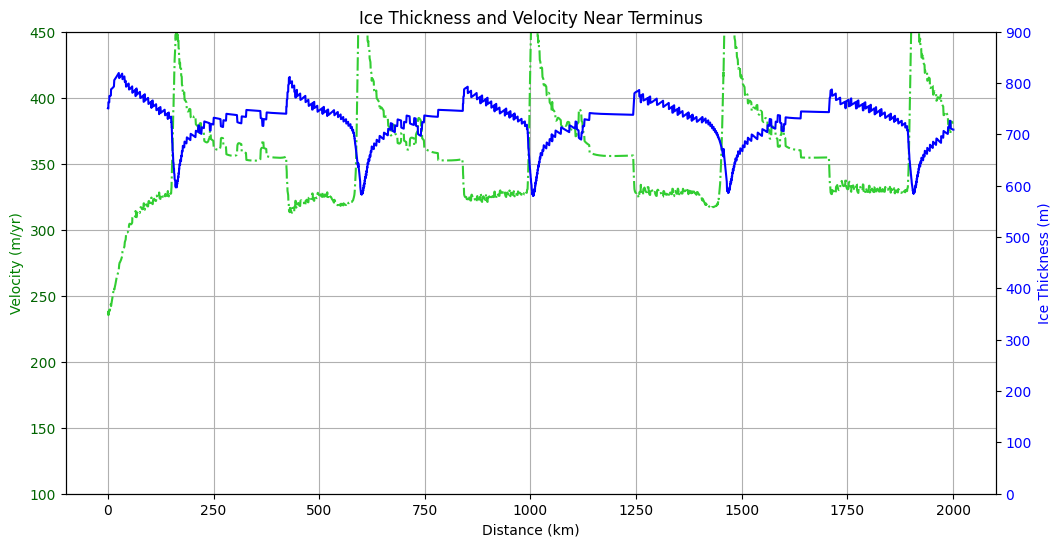

In [29]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(time, term_surface_velocity, 'limegreen', ls = '-.', label='Surface Velocity (km/yr)')
ax1.set_xlabel(xaxis_vel)
ax1.set_ylabel(yaxis_vel, color='green')
ax1.tick_params(axis='y', labelcolor='darkgreen')
ax1.set_ylim(100,450)
ax1.grid()


ax2 = ax1.twinx()
ax2.plot(time_steps, term_thinning, color='blue', linestyle='-', label=f'Thickness {dist_behind_terminus} nodes behind terminus')
ax2.set_ylabel(("Ice Thickness (m)"), color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0,900)


plt.title("Ice Thickness and Velocity Near Terminus")
plt.show()

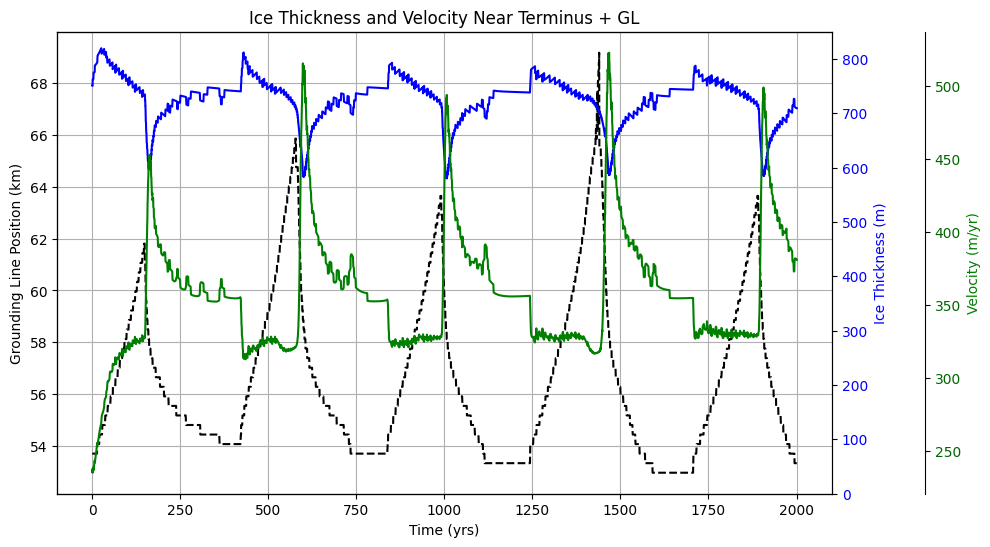

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Grounding Line Position
ax1.plot(time, GL_km, label='Grounding Line Position', ls='--', color='black')
ax1.set_xlabel("Time (yrs)")
ax1.set_ylabel(yaxis_GL_better, color='black')
ax1.tick_params(axis='y', labelcolor='black')
# ax1.set_xlim(3000, 5000)
ax1.grid()

# Ice Thickness behind terminus
ax2 = ax1.twinx()
ax2.plot(time_steps, term_thinning, color='blue', linestyle='-', label=f'Thickness {dist_behind_terminus} nodes behind terminus')
ax2.set_ylabel("Ice Thickness (m)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Surface Velocity — create new axis and offset it to avoid overlapping ax2
ax3 = ax1.twinx()
ax3.plot(time, term_surface_velocity, 'green', ls='-', label='Surface Velocity (km/yr)')
ax3.set_ylabel(yaxis_vel, color='green')
ax3.tick_params(axis='y', labelcolor='darkgreen')

# Offset ax3's spine to the right to prevent overlapping ax2
ax3.spines["right"].set_position(("axes", 1.12))  # 10% to the right of the ax1 right spine
ax3.spines["right"].set_visible(True)  # Make sure it's visible
ax2.set_ylim(0,850)


# Title and show
plt.title("Ice Thickness and Velocity Near Terminus + GL")
plt.show()

# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/SingleCycle.svg", format ="svg", bbox_inches='tight')
